<h1>
    Deutschland
</h1>

# Daten

Im Folgenden wird statt mit Kalender-Daten, mit Tagen seit dem 24.2.2020, dem Beginn der täglichen Datenemeldungen des Robert-Koch-Instituts gerechnet. Die folgende Tabelle ermöglicht eine Umrechnung.

<table>
    <thead>
        <th>
           Tag Nr.
        </th>
        <th>
            Datum
        </th>
    </thead>
    <tbody>
        <tr>
            <td>0</td><td>24.2.2020</td>
        </tr>
        <tr>
            <td>10</td><td>5.3.2020</td>
        </tr>
        <tr>
            <td>20</td><td>15.3.2020</td>
        </tr>
        <tr>
            <td>30</td><td>25.3.2020</td>
        </tr>
        <tr>
            <td>40</td><td>4.4.2020</td>
        </tr>
        <tr>
            <td>50</td><td>14.4.2020</td>
        </tr>
        <tr>
            <td>60</td><td>24.4.2020</td>
        </tr>
    </tbody>
</table>

In [3]:
lastDate_de="7.4.2020"
infections_de=[16,18,21,26,53,66,117,150,188,240,400,639,795,902,1139,1296,1567,2369,3062,3795,4838,6012,7156,8198,10999,13957,16662,18610,22672,27436,31554,36508,42288,48582,52547,57298,61913,67366,73522,79696,85778,91714,95391,99225]
dataNr_de=len(infections_de)
maxDays=dataNr_de+3
deads_de=[12,20,31,46,55,86,114,149,198,253,325,389,455,583,732,872,1017,1158,1342,1434,1607]
deadsNr_de=len(deads_de)
infections_de_points=[(n,infections_de[n]) for n in range(1,dataNr_de)]
from IPython.display import Markdown as md

# Exponentielles Modell

In der ersten Phase der Epidemie, etwa bis zum 31.3.2020 (Tag 36), beschreibt ein einfaches Modell des exponentiellen Wachstums die Entwicklung der Zahl der vom Robert-Koch-Institut gemeldeten Infektionsfälle recht gut. Die realen Fallzahlen schwanken in geringem Maße um den Verlauf einer approximierenden Exponentialfunktion. Wie wir sehen werden, wird die Abweichung Ende März größer als die vorherige zufällige Schwankungsbreite - das Modell eines exponentiellen Verlaufs stößt an seine Grenzen.

## Zahl der Infektionen (täglich)

Kumulierte Zahl der Infektionen in Deutschland nach Angaben des Robert-Koch-Instituts vom 24.2.2020 (Tag 0) bis zum 31.3.2020. Die rote Kurve stellt eine Exponentialfunktion dar, die den Verlauf der Infektionszahlen approximiert.

398.2168506681904*e^(0.14278674625521573*x)

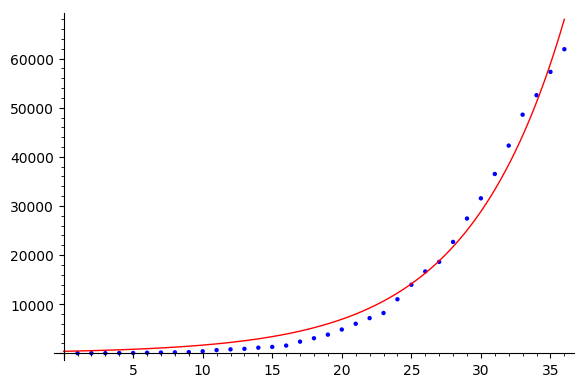

In [4]:
dataExpNr_de=36
infectionsExp_de=infections_de[0:dataExpNr_de]
infectionsExp_de_points=infections_de_points[0:dataExpNr_de]
var('x,y,a,b')
f_exp(x)=a*e^(b*x)
q=find_fit(infectionsExp_de_points, f_exp, solution_dict = True)
show(f_exp(a=q[a],b=q[b]))
list_plot(infectionsExp_de_points)+plot(f_exp(a=q[a],b=q[b]), 0, dataExpNr_de, color='red')

Bei einer rein exponentiellen Entwicklung $a e^{xc}$ sollen sich die Logarithmen der Werte entsprechend einer linearen Funktion $kx+\ln(a)$ entwickeln. eine solche Funktion können wir mit Hilfe der linearen Regression näherungsweise bestimmen.

Sehen wir uns deshalb die Logarithmen dieser Werte an. Dazu zeichnen wir eine passende Regressionsgerade und einen Korridor um diese Gerade, der die zufälligen Schwankungen begrenzt.

0.2396102488135452*x + 3.322279817571749

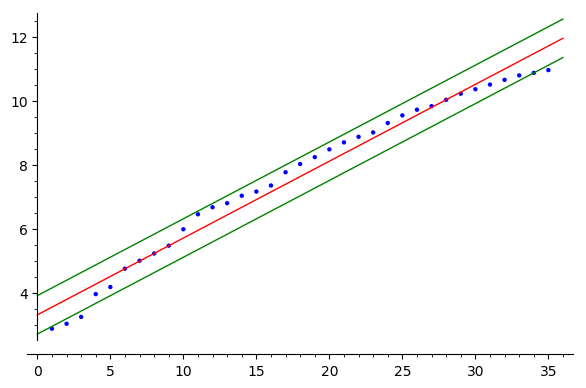

In [5]:
f_lin(x)=b*x+a
infectionsLnExp_de_points=[(n,ln(infections_de[n])) for n in range(1,dataExpNr_de)]
q=find_fit(infectionsLnExp_de_points, f_lin, solution_dict = True)
show(f_lin(a=q[a],b=q[b]))
delta=0.6
list_plot(infectionsLnExp_de_points)+plot(f_lin(a=q[a],b=q[b]), 0, dataExpNr_de, color='red')+plot(f_lin(a=q[a],b=q[b])+delta, 0, dataExpNr_de, color='green')+plot(f_lin(a=q[a],b=q[b])-delta, 0, dataExpNr_de, color='green')

Wie man sieht, verlassen die Logarithmen der kumulierten Infektionszahlen um den Tag 36 (31.3.2020) den Korridor der zufälligen Schwankungen. Dieser Trend setzte sich in den folgenden Tagen fort wie man sehen kann, wenn man die Berechnungen mit $dataExpNr > 36$ wiederholt.

Relativer Anstieg zum Vortag:

## Zahl der Infektionen (gemittelt)

Der tägliche Zuwachs an Infektionsfällen in Deutschland schwankt sehr stark:

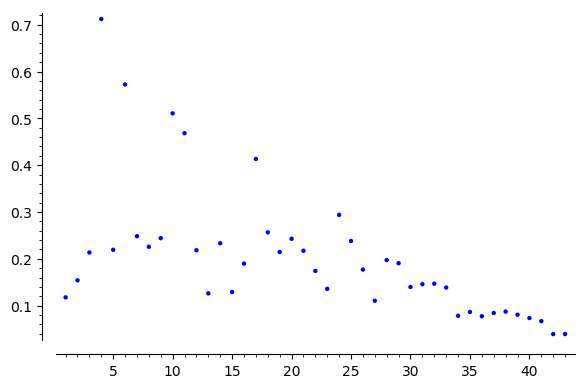

In [6]:
k_n_de = [(n,ln(infections_de[n]/infections_de[n-1])) for n in range(1,dataNr_de)]
list_plot(k_n_de)

Um dennoch eine Tendenz zu erkennen wird im folgenden Diagramm für jedes $n$ $k_1(n)=\frac{\ln(i(n))-\ln(i(n-w))}{w}$ berechnet, wobei $i(n)$ die Zahl der Infektionen am Tag $n$ und $w$ die Größe eines Zeitfensters vor Tag $n$ ist. Dies ist der durchschnittliche Exponent eines angenommenen exponentiellen Wachstums gemittelt aus den Daten von $w+1$ Tagen. Je größer $w$ ist, desto klarer ist eine Tendenz zu erkennen.

Wir verwenden im Folgenden $w=6$, also die 7 Daten einer Woche, um den gleitenden Durchschnitt zu berechnen. Dies ist der größte Wert, bei dem im Bereich immer genau zwei Wochenend-Tage liegen. Dies ist von Interesse, da das Robert-Koch-Institut am Wochenende Daten nur unvollständig erhält. Sie können diesen Wert ändern und das Modell neu berechnen lassen.

Für $w=6$ sind die Werte im folgenden Diagramm dargestellt, zusammen mit dem Ergebnis einer linearen Regression in rot.

-0.00790070140479937*x + 0.40645308717991757

\text{\texttt{Schnittpunkt{ }mit{ }der{ }x{-}Achse{ }bei:{ }}} 51.4451902882

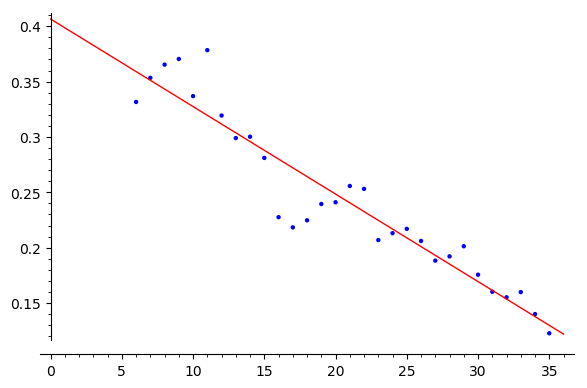

In [7]:
w=6
def k1(n): return (ln(infections_de[n])-ln(infections_de[n-w]))/w
k1_n_de = [(n,k1(n)) for n in range(w,dataExpNr_de)]
var('a,b')
f0(x)=a*x+b
q=find_fit(k1_n_de,f0,solution_dict=True)
show(f0(a=q[a],b=q[b]))
a0=q[a]
b0=q[b]
show(latex("Schnittpunkt mit der x-Achse bei: ")+(-b0/a0))
list_plot(k1_n_de)+plot(f0(a=q[a],b=q[b]),0,dataExpNr_de,color='red')

In [8]:
intersection=-b0/a0
md(u"Die Regressionsgrade trifft die $y-$Achse bei etwa Tag $%i$ - falls das Modell zutrifft, würde die Zahl der Neuinfektionen in der Woche vor diesem Tag auf 0 sinken."%(intersection))

Die Regressionsgrade trifft die $y-$Achse bei etwa Tag $51$ - falls das Modell zutrifft, würde die Zahl der Neuinfektionen in der Woche vor diesem Tag auf 0 sinken.

In [9]:
md(u"Wie wir gesehen haben, verliert das exponentielle Modell aber bereits um den Tag %i seine Gültigkeit, weil sich die Ausbreitung der Epidemie vorher abschwächt. Insofern liefert die lineare Regression hier eine eher pessimistische Abschätzung."%(dataExpNr_de))

Wie wir gesehen haben, verliert das exponentielle Modell aber bereits um den Tag 36 seine Gültigkeit, weil sich die Ausbreitung der Epidemie vorher abschwächt. Insofern liefert die lineare Regression hier eine eher pessimistische Abschätzung.

## Reproduktionsrate

Hauptziel der Massnahmen zur Eindämmung der Pandemie ist zunächst, eine Überlastung der Intensivpflege in den deutschen Krankenhäusern (ohne zusätzliche Ressourcen) zu verhindern. Dazu müsste die Reproduktionsrate des Virus, d.h. die Zahl der von einem Infizierten angesteckten Personen nach Einschätzung der Deutschen Gesellschaft für Epidemiologie auf 1.1-1.2 gesenkt werden.

Wir suchen eine Formel zur Berchnung der aktuellen Reproduktionsrate. Dazu nehmen wir an, dass die Basisreproduktionsrate (ohne einschränkende Maßnahmen) bei $r_0 = 3$ liegt, dem Wert, den die [Studie 12 des Imperial College" vom 26.3.2019](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf) annimmt, mit einer Variation zwischen 2.4 und 3.3. Die Zeit, in der ein Patient andere Personen anstecken kann, wird mit 14 Tagen angesetzt. Wie nehmen an, dass die maximale Reproduktionsrate, die mangels Schutzmaßnahmen gleich der Basisreproduktionsrate ist, in den 2 Wochen aktiv ist, in denen der Anstieg der Infektionen am höchsten ist.

Nehmen wir ferner an, dass die Ausbreitung des Virus in dieser Zeit durch eine Exponentialfunktion $a e^{kx}$ beschrieben wird, so ist der relative Anstieg in dieser Periode, die mit dem Tag $x_0$ beginnt, $\frac{e^{k(x+14)}}{e^{k x}}=e^{14 k}$. 

Wenn wir nun die 2 Wochen mit maximalem relativem Anstieg der Infektionen finden, so können wir den zugehörigen Koeffizienten $k_{max}$ bestimmen, der der maximalen Basisreproduktionsrate von 2.4 entspricht.

Wir berechnen den Koeffizienten für Deutschland und zum Vergleich für China und Italien.

### Deutschland

In [10]:
r_0=3
r0_min=2.4
r0_max=3.3
k_max_de=max([ln((infections_de[n+14])/infections_de[n])/14 for n in range(0,dataNr_de-14)])
k_max_de.n()

0.322294761866950

### China

In [11]:
infections_ch=[278,309,573,834,1294,1982,2757,4530,5989,7728,9711,11811,14401,17228,20461,24352,28049,31195,34582,37234,40217,42690,44712,46532,48530,50036,51174]
dataNr_ch=len(infections_ch)
k_max_ch=max([ln((infections_ch[n+14])/infections_ch[n])/14 for n in range(0,dataNr_ch-14)])
k_max_ch.n()

0.311930570268833

### Italien

In [12]:
infections_it=[39,79,159,236,326,471,650,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,15113,17660,21157,24747]
dataNr_it=len(infections_it)
k_max_it=max([ln((infections_it[n+14])/infections_it[n])/14 for n in range(0,dataNr_it-14)])
k_max_it.n()

0.341288968452143

### Diskussion

Die maximale Infektionsausbreitung findet in der Anfangsphase der Pandemie statt. In dieser Phase werden Fälle oft unvollständig erfasst, woraus sich eine Unsicherheit der Berechnung ergibt. Der Wert für Deutschland liegt zwischen dem Wert für China und Italien, die sich ihrerseits um etwa 9% unterscheiden.
Wir arbeiten im folgenden weiter mit dem Wert $k_{max}$ für Deutschland.

In [13]:
k_max=k_max_de

<b>Annahme:</b>Wir nehmen im Folgenden einen linearen Zusammenhang zwischen der aktuellen Reproduktionsrate $r$ und dem aktuellen Koeffizienten $k$ der die Zahl der Infektionen beschreibenden Exponentialfunktion an. Dies ist hier nur für den Bereich von Interesse, für den das Modell exponentiellen Wachstums anwendbar ist, also für einen Reproduktionsgrad $r > 1$ und einen Exponentialkoeffizienten $k > 0$. Sei etwa $r=c\cdot k + d$. Dann müssen wir $d=1$ setzen, damit $k$ und $r$ gleichzeitig den Bereich der Anwendbarkeit des exponentiellen Modells verlassen, $r=c\cdot k+1$.

$k(n)$ haben wir bereits oben in $k_1$ ermittelt, jeweils gemittelt über eine Woche. Damit ergibt sich für den Koeffiziemtem $c=\frac{r_0-1}{k_{max}}$ und für Reproduktionsgrad $r$, ebenfalls gemittelt über eine Woche $r(n)=c \cdot k_1(n) + 1 = \frac{r_0-1}{k_{max}}\cdot k_1(n)+1$:

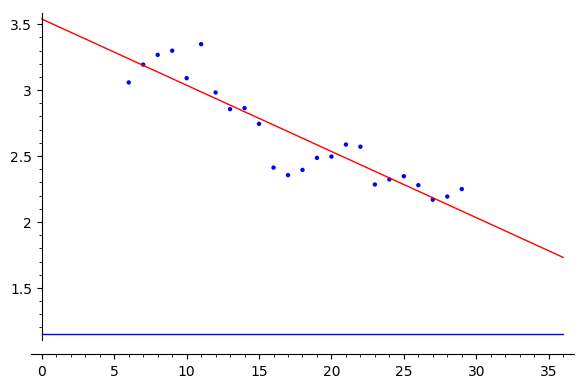

In [14]:
def rr1(rr,n): return ((rr-1)/k_max)*k1(n)+1
def r1(n): return rr1(r_0,n)
r1_n_de = [(n,r1(n)) for n in range(w,dataExpNr_de-w)]
f10(x)=a*x+b
q10=find_fit(r1_n_de,f10,solution_dict=True)
a10=q10[a]
b10=q10[b]
r_z=1.15
list_plot(r1_n_de)+plot(f10(a=a10,b=b10),0,dataExpNr_de,color='red')+plot(r_z,0,dataExpNr_de,color='blue')

Die blaue Linie in diesem Diagramm bezeichnet einen zunächst anzustrebenden Reproduktionsgrad von $r_z=1.15$. Wir berechnen, an welchem Tag dieser nach diesem Modell erreicht würde.

In [15]:
r_z_x=solve(a10*x+b10==r_z,x)
print "Reproduktionsgrad von ",r_z," erreicht an Tag ",r_z_x[0].rhs().n()

Reproduktionsgrad von  1.15000000000000  erreicht an Tag  47.5894541281536


Auch dies ist eine eher pessimistische Abschätzung, da das exponentielle Modell vorher seine Gültigkeit verliert.

Sehen wir uns den Wert $r_{last}$ für die Reproduktionsrate am Ende der exponentiellen Phase an. Wenn der letzte Wert von $k_1$ über (unter) der Regressionsgeraden liegt, so wird der Wert von $r_{last}$ über (unter) dem Wert liegen, der im obigen Diagramm durch die rote Gerade für die Funktion $r$ angezeigt wird.

In [16]:
r_last=(r1(dataNr_de-w-1)).n()
show(LatexExpr("r_{last}="), r_last)

r_{last}= 1.63359083819025

In [17]:
md(u"Je nachdem wo die Basisreproduktionsrate $r_0$ zwischen %f und %f lag ergibt sich für die Schätzung der aktuellen Rate ein kleinerer $(r_{opt})$ bzw. größerer ($r_{pess}$) Wert:"%(r0_min,r0_max))

Je nachdem wo die Basisreproduktionsrate $r_0$ zwischen 2.400000 und 3.300000 lag ergibt sich für die Schätzung der aktuellen Rate ein kleinerer $(r_{opt})$ bzw. größerer ($r_{pess}$) Wert:

In [18]:
r_opt=(rr1(r0_min,dataNr_de-w-1)).n()
r_pess=(rr1(r0_max,dataNr_de-w-1)).n()
show(LatexExpr("r_{opt}="), r_opt)
show(LatexExpr("r_{pess}="), r_pess)

r_{opt}= 1.44351358673317

r_{pess}= 1.72862946391879

## Verdopplungsrate (gemittelt)

Am 28.3.2020 [erklärte Kanzleramtschef Braun](https://www.tagesspiegel.de/politik/kanzleramtschef-erteilt-rascher-lockerung-eine-absage-bis-20-april-bleiben-alle-coronavirus-massnahmen-bestehen/25690036.html): 

> Wenn wir es schaffen, die Infektionsgeschwindigkeit so zu verlangsamen, dass wir zehn, zwölf oder noch mehr Tage haben bis zu einer Verdopplung, dann wissen wir, dass wir auf dem richtigen Weg sind.

In [19]:
lastDay=dataExpNr_de-w
#lastDays=lastDay
lastDays=2
md(u"Dazu ermitteln wir für jeden Tag die Verdopplungsrate für den Zeitraum von $%i$ Tage. Wir analysieren dazu die mittlere Verdoppelungsrate der letzten %i Tage."%(w+1,lastDays))

Dazu ermitteln wir für jeden Tag die Verdopplungsrate für den Zeitraum von $7$ Tage. Wir analysieren dazu die mittlere Verdoppelungsrate der letzten 2 Tage.

Nehmen wir an, es sind zum Zeitpunkt $n$ $i$ Infizierte gemeldet und zum Zeitpunkt $n_0$ $i_0$ Infizierte. Zwischen $n_0$ und $n$ liegen $d=n-n_0$ Tage. Dieser Anstieg wird in der exponentiellen Phase durch eine Exponentialfunktion der Form $a(n)e^{k(n)x}$ beschrieben: $i_0=a(n)e^{k(n)n_0}$, $i=a(n)e^{k(n)n}= a(n)e^{k(n)(n_0+d)}$. 

Damit ist $\frac{i}{i_0}=e^{k(n)d}$ und somit $k(n)=\frac{ln(i)-ln(i_0)}{d}$.

Die Zeit, in der sich die Werte von $ae^{k(n)x}$ verdoppeln ist die Zeit $dd$ für die $a(n)e^{k(n)(x+dd)}=2a(n)e^{k(n)x}$ ist. Damit ergibt sich für die Verdopplungszeit $dd=\frac{\ln(2)}{k(n)}=\frac{\ln(2)\cdot d}{ln(i)-ln(i_0)}$.

Je größer die Zeitspanne $d$ gewählt wird, desto verlässlicher wird die Verdopplungsrate ermittelt, desto ungenauer sind jedoch Aussagen darüber, die einzelne Tage betreffen. Im folgendenDiagramm können Sie mit $d$ experimentieren.

In [20]:
@interact
def _(d=slider(1,15,step_size=1,default=6)):
    dd_de=[(n,(ln(2)*d)/(ln(infections_de[n])-ln(infections_de[n-d]))) for n in range(d,dataExpNr_de)]
    ddLast_de=dd_de[dataExpNr_de-2*d:dataExpNr_de-d]
    #ddLast_de=dd_de[25:31]
    var('x,a,b')
    f1(a,b,x)=a*x+b
    q=find_fit(ddLast_de,f1,variables=[x],solution_dict=True)
    c=11
    show(f1(a=q[a],b=q[b]))
    show(latex("Ziel: Verdopplung in hoechstens ")+c+latex(" Tagen"))
    show(latex("Erreicht Ziel bei ")+(c-q[b])/q[a]+latex(" Tagen"))
    show(list_plot(dd_de)+plot(f1(a=q[a],b=q[b]),0,dataExpNr_de,color='red')+plot(11,0,dataExpNr_de,color='blue'))
    #show(list_plot(ddLast_de)+plot(11,0,maxDays,color='blue'))
    #show(ddLast_de)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjE2NTJhZjYxNDA+IHdpdGggMSB3aWRnZXQKICBkOiBUcmFuc2Zvcm1JbnRTbGlkZXIodmFsdWU9NiwgZGVzY3JpcHRpb27igKY=


In [21]:
c=11
md(u"Wie niedrig muss die aktuelle Reproduktionsrate sein, damit die Zeit für die Verdopplung der Infektionen über  c=%i Tagee steigt?"%(c))

Wie niedrig muss die aktuelle Reproduktionsrate sein, damit die Zeit für die Verdopplung der Infektionen über  c=11 Tagee steigt?

## Zahl der Todesfälle

Die Zahl der gemeldeten Infektionen hängt direkt davon ab, wie viele Personen auf das Virus getestet werden. Bei einem Ausbau der Testmöglichkeiten könnten so auch die Infektionszahlen einen zusätzlichen Anstieg aufweisen, was die mittelfristige Vergleichbarkeit der Daten beschränken würde.

Wenn wir davon ausgehen, dass - im Unterschied zu den Infektione - alle Corona-bedingten Todesfälle auch bisher bereits durch Tests bestätigt wurden, so bietet die kumulierte Zahl der Todesfälle auf mttlere Sicht besser vergleichbare Werte, wobei deren zufällige Schwankung durch die geringe Zahl der Fälle größer anzunehmen ist.

Das Robert-Koch-Institut veröffentlicht die Zahl der Corona-Todefälle ab dem 18.3.2020 (Tag 23) jeweils um 0:00. Wir nehmen für die Zeit von der Erfassung der Infektion bis zum Tod des Patienten einen Zeitraum von 10 Tagen an und verschieben die Werte zeitlich entsprechend.

8.28493313160054*e^(0.16209914869760897*x)

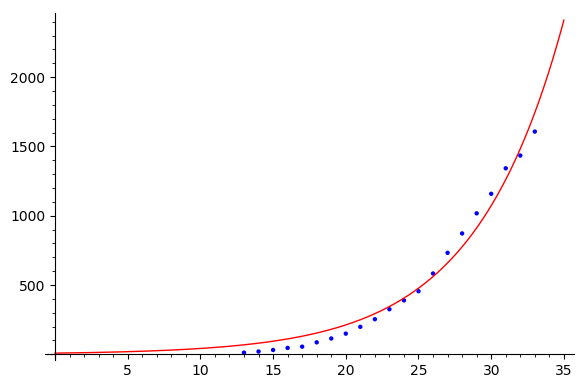

In [22]:
delay=10
deads_de_points=[(n+23-delay,deads_de[n]) for n in range(0,deadsNr_de)]
q=find_fit(deads_de_points, f_exp, solution_dict = True)
show(f_exp(a=q[a],b=q[b]))
list_plot(deads_de_points)+plot(f_exp(a=q[a],b=q[b]), 0, 35, color='red')

Sehen wir uns die Logarithmen dieser Werte an. Dazu zeichnen wir eine passende Regressionsgerade und einen Korridor um diese Gerade.

In [23]:
start_common=23-delay
end_common=start_common+deadsNr_de-1
md(u"Wir betrachten das Verhältnis der kumulierten Todesfälle (nach links verschoben um %i Tage) zu den kumulierten Infektionen von Tag %i bis Tag %i."%(delay, start_common,end_common))

Wir betrachten das Verhältnis der kumulierten Todesfälle (nach links verschoben um 10 Tage) zu den kumulierten Infektionen von Tag 13 bis Tag 33.

0.23748035332545903*x + 0.02369159286902278

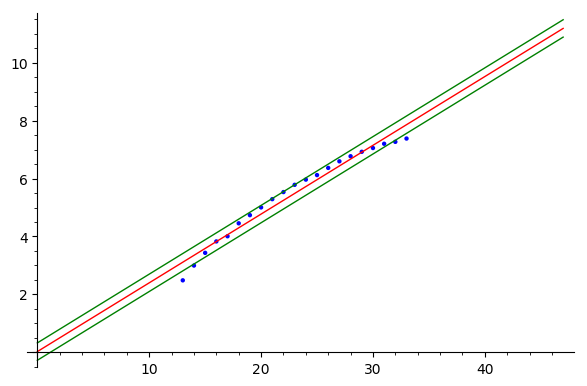

In [24]:
f_lin30(x)=b*x+a
deads_ln_de_points=[(n+23-delay,ln(deads_de[n])) for n in range(0,deadsNr_de)]
q30=find_fit(deads_ln_de_points, f_lin30, solution_dict = True)
a30=q30[a]
b30=q30[b]
show(f_lin30(a=a30,b=b30))
delta=0.3
list_plot(deads_ln_de_points)+plot(f_lin30(a=a30,b=b30), 0, maxDays, color='red')+plot(f_lin(a=a30,b=b30)+delta, 0, maxDays, color='green')+plot(f_lin(a=a30,b=b30)-delta, 0, maxDays, color='green')

In [25]:
md(u"Die folgende Graphik zeigt für den Tag $n$ das Verhältnis der bis zum Tag $n+%i$ Verstorbenen zu den bis zum Tag $n$ als infiziert Erkannten."%(delay))

Die folgende Graphik zeigt für den Tag $n$ das Verhältnis der bis zum Tag $n+10$ Verstorbenen zu den bis zum Tag $n$ als infiziert Erkannten.

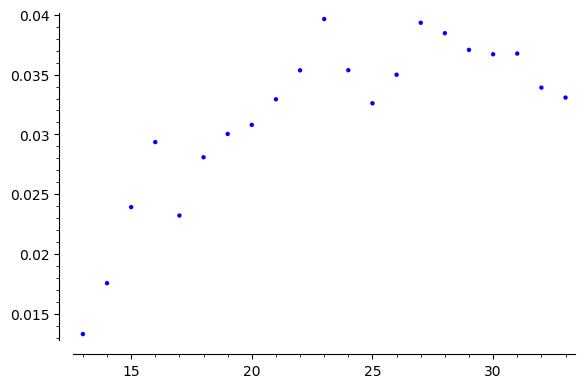

In [26]:
deads_per_infect_de=[(n,deads_de[n-23+delay]/infections_de[n]) for n in range(23-delay,23+deadsNr_de-delay) ]
list_plot(deads_per_infect_de)

# Logistisches Modell

In der logistischen Phase, ab Anfang April, kann das Wachstum der Zahl der gemeldeten Infektionen immer schlechter durch Exponentialfunktionen beschrieben. das Virus stößt - aus welchen Gründen auch immer - auf Faktoren, die seine Ausbreitung behindern (z.B. Senkung der Reproduktionsrate durch Einschränkung sozialer Kontakte, hoher Grad der Durchseuchung der Bevölkerung).

Ein solches Wachstum kann durch eine logistische Funktion $a\cdot \frac{S}{a+(S-a)\cdot e^{-k x}}$ beschrieben werden. Dabei ist $a$ der Anfangswert bei  $x=0$, $S$ ist eine angenommene Obergrenze, der sich die Zahl der Infizierten asymptotisch annähert und $k$ ist ein Parameter der die Geschwindigkeit dieser Annäherung beschreibt.

Die logistische Funktion ergibt sich als [Lösung der logistischen Differentialgleichung](http://statistik.wu-wien.ac.at/~leydold/MOK/HTML/node183.html) die ihrerseits aus dem [SI-Modell](https://de.wikipedia.org/wiki/SI-Modell) der Entwicklung von Epidemien abgeleitet ist.

Für eine erste Näherung beachten wir, dass nach den Berechnungen des ersten Teils der Koeffinzient von $x$ im Exponenten etwa 0.2 ist. Im logistischen Modell ist der Exponent $kS$, wobei $S$ in der Größenordnung von mehreren $100 000 = 10^5$, $k$ ist also in der Größenordnung von $10^{-6}$ zu erwarten.

Eine logistische Regression ohne Fixierung eines Parameters erweist sich als wirkungslos.

'a=' 5127.800224852073 ', k=' 200000.0 ', S=' 25041.04656475089

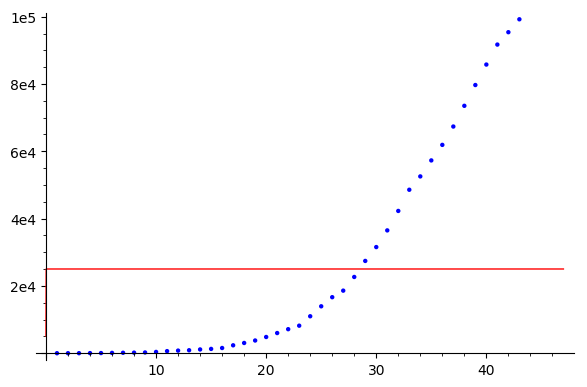

In [27]:
var('x,a,k,S')
f_log5(a,k,S,x)=a*S/(a+(S-a)*e^(-k*S*x))
q_log5=find_fit(infections_de_points, f_log5, initial_guess=(1000,10^(-6),200000),variables=[x],solution_dict = True)
a_log5=q_log5[a]; k_log5=q_log5[k];S_log5=q_log5[S];
show("a=",a_log5,", k=",k_log5,", S=",S_log5)
show(list_plot(infections_de_points)+plot(f_log5(a=a_log5,k=k_log5,S=S_log5), 0, maxDays, color='red'))

Wir legen zunächst den Wert $S$ fest und optimieren $a$ und $k$:

In [28]:
@interact
def _(S=slider(100000,200000,step_size=1000,default=120000)):
    var('x,a,k')
    f_log10(a,k,x)=a*S/(a+(S-a)*e^(-k*S*x))
    q_log10=find_fit(infections_de_points, f_log10, initial_guess=(1000,10^(-6)),variables=[x],solution_dict = True)
    a_log10=q_log10[a]; k_log10=q_log10[k];
    show("a=",a_log10,", k=",k_log10)
    #show(f_log10(a=a_log10,k=k_log10,S=S_log10))
    show(list_plot(infections_de_points)+plot(f_log10(a=a_log10,k=k_log10), 0, maxDays, color='red'))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjE2M2NjNWJlZDg+IHdpdGggMSB3aWRnZXQKICBTOiBUcmFuc2Zvcm1JbnRTbGlkZXIodmFsdWU9MTIwMDAwLCBkZXNjcmnigKY=


Als Alternative wählen wir den Anfangswert $a$ und lassen $k$ und $S$ berechnen.

In [29]:
@interact
def _(a=slider(100,500,step_size=10,default=110)):
    var('x,k,S')
    f_log15(k,S,x)=a*S/(a+(S-a)*e^(-k*S*x))
    q_log15=find_fit(infections_de_points, f_log15, initial_guess=(10^(-6),120000),variables=[x],solution_dict = True)
    S_log15=q_log15[S]; k_log15=q_log15[k];
    show("S=",S_log15,", k=",k_log15)
    show(list_plot(infections_de_points)+plot(f_log15(k=k_log15,S=S_log15), 0, maxDays, color='red'))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjE2M2NjNWJkNzA+IHdpdGggMSB3aWRnZXQKICBhOiBUcmFuc2Zvcm1JbnRTbGlkZXIodmFsdWU9MTEwLCBkZXNjcmlwdGnigKY=


Auch dies erweist sich als nutzlos. Optimieren wir nun $a$ und $S$ in Abhängigkeit von $k$.

In [39]:
@interact
def _(k=slider(5*10^(-7),25*10^(-7),step_size=10^(-7),default=1.65*10^(-6))):
    var('x,a,S')
    f_log18(a,S,x)=a*S/(a+(S-a)*e^(-k*S*x))
    q_log18=find_fit(infections_de_points, f_log18, initial_guess=(110,120000),variables=[x],solution_dict = True)
    a_log18=q_log18[a]; S_log18=q_log18[S];
    show("S=",S_log18,", a=",a_log18)
    show(list_plot(infections_de_points)+plot(f_log18(a=a_log18,S=S_log18), 0, maxDays, color='red'))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjE2NDAzMTZhMjg+IHdpdGggMSB3aWRnZXQKICBrOiBTZWxlY3Rpb25TbGlkZXIoZGVzY3JpcHRpb249dSdrJywgaW5kZXjigKY=


Hier können Sie versuchen, eine passende logistische Funktion zu finden:

In [31]:
var('x,kS,S,k')
pil=list_plot(infections_de)
a=278
f_log20(x,a,kS,S)=a*S/(a+(S-a)*e^(-kS*x))
@interact
def _(a=slider(100,5000,step_size=10,label='a'),kS=slider(0.1,0.75,step_size=0.01,label='k*S'),S=slider(40000,500000,step_size=1000)):
    show(plot(f_log20(x,a,kS,S),(x,0,40),color='red')+pil)
    show(LatexExpr('k='),kS/S)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjE2M2M4OGQ1MDA+IHdpdGggMyB3aWRnZXRzCiAgYTogVHJhbnNmb3JtSW50U2xpZGVyKHZhbHVlPTEwMCwgZGVzY3JpcHTigKY=


Versuchen wir eine naive Regression,bei der alle 3 Parameter $a,k,S$ optimiert werden sollen.: